<a href="https://colab.research.google.com/github/Found-Bugs/Pengolahan-Citra-Visi-Komputer/blob/Week-6/Spasial_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [299]:
# Fungsi untuk melakukan konvolusi dengan parameter stride dan padding
def convolution2D(image, kernel, stride, padding):
    # Ambil ukuran gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Tentukan padding untuk gambar jika padding > 0
    if padding > 0:
        padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    else:
        padded_image = image

    # Ambil ukuran gambar setelah padding
    padded_height, padded_width = padded_image.shape

    # Hitung ukuran output gambar setelah konvolusi
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Buat array kosong untuk hasil
    output = np.zeros((output_height, output_width))

    # Lakukan konvolusi dengan menggeser kernel sesuai stride
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Indeks gambar yang sesuai dengan posisi kernel yang digeser
            i_start = i * stride
            j_start = j * stride

            # Ambil region of interest (ROI) dari gambar
            region = padded_image[i_start:i_start + kernel_height, j_start:j_start + kernel_width]

            # Hitung nilai konvolusi (elemen-wise multiplication dan sum)
            output[i, j] = np.sum(region * kernel)

    return output

In [300]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [301]:
# image Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

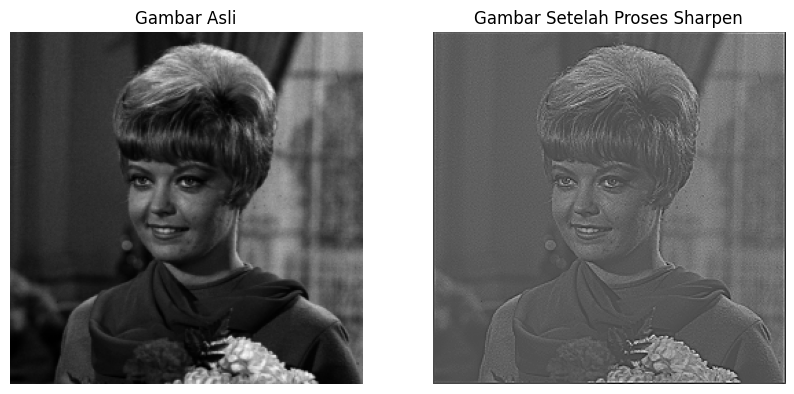

In [302]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_sharpen, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses Sharpen")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [303]:
# image Emboss
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

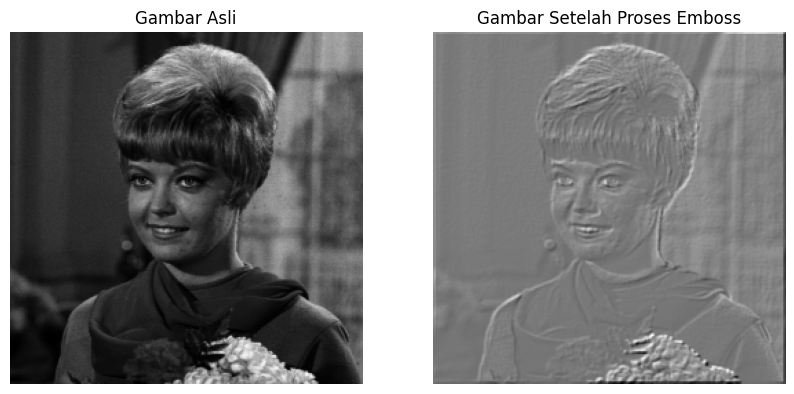

In [304]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_emboss, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses Emboss")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [305]:
# image Left Sobel Edge Detection
kernel_lsed = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

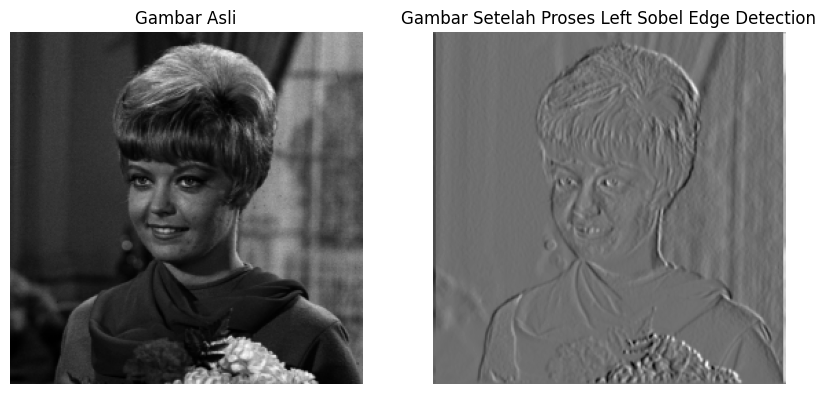

In [306]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_lsed, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses Left Sobel Edge Detection")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [307]:
# image Canny Edge Detection
kernel_ced = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

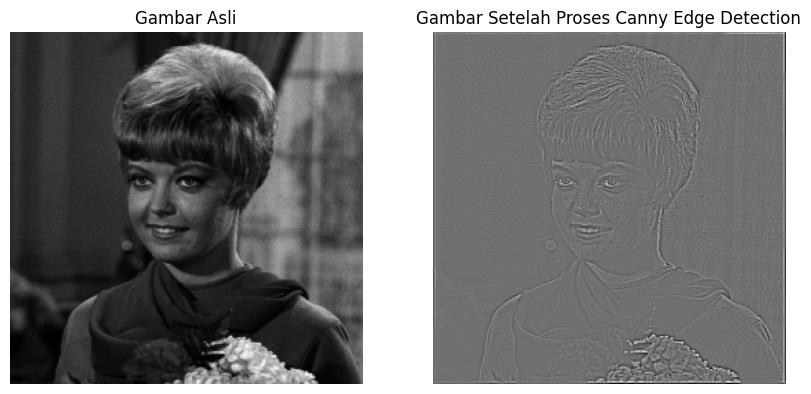

In [308]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_ced, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses Canny Edge Detection")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [309]:
# image Prewitt Edge Detection
kernel_ped = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

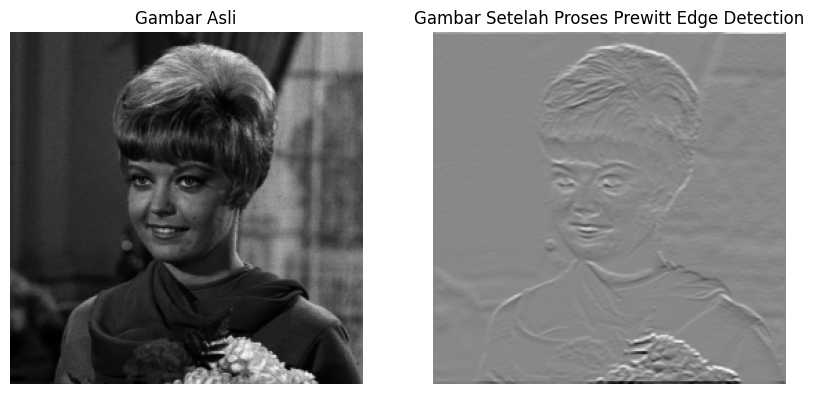

In [310]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_ped, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses Prewitt Edge Detection")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [311]:
# image 5x5 Gaussian Blur
kernel_gaussian_blur = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256

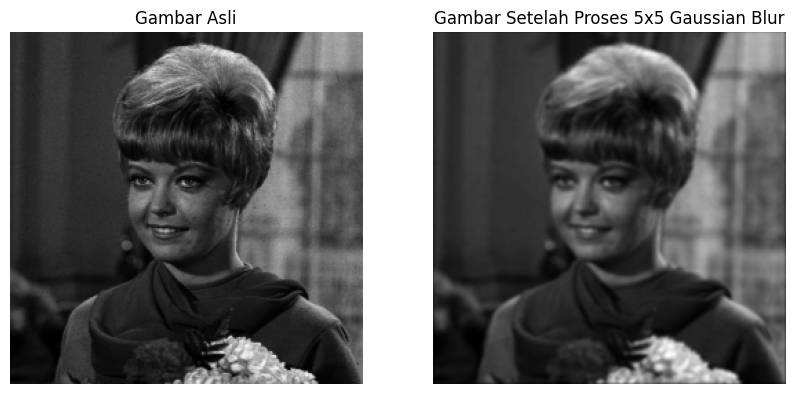

In [312]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, kernel_gaussian_blur, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses 5x5 Gaussian Blur")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()

In [313]:
# image 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)

gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

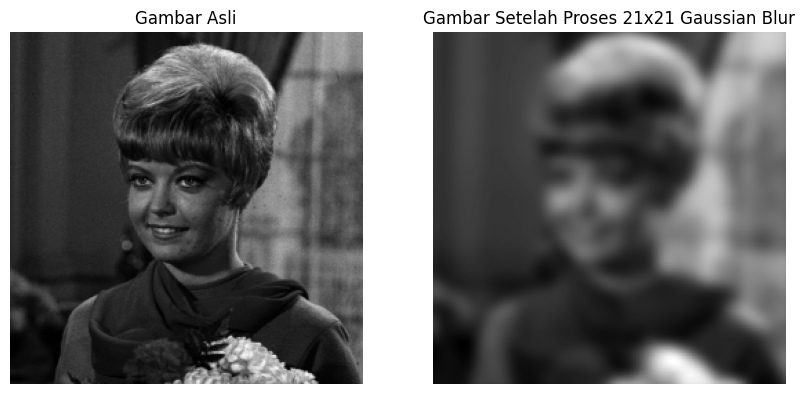

In [314]:
# Menjalankan fungsi konvolusi dengan stride 1 dan padding 2
convolved_image = convolution2D(img_gray, gauss_kernel, 1, 2)

# Cetak gambar asli dan hasil konvolusi menggunakan matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gambar Setelah Proses 21x21 Gaussian Blur")
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.show()